In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats, special

import seaborn as sns
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
dataframe = pd.read_csv('SpotifyFeatures.csv')

In [4]:
print(dataframe)

        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0

In [5]:
dataframe.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [6]:
dataframe.shape

(232725, 18)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [8]:
dataframe.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [9]:
#creating subsets
df1 = dataframe[['track_id' , 'artist_name' , 'popularity' ]].loc[0:15]
df1

track_id           artist_name  popularity
0   0BRjO6ga9RKCKjfDqeFgWV        Henri Salvador           0
1   0BjC1NfoEOOusryehmNudP     Martin & les fées           1
2   0CoSDzoNIKCRs124s9uTVy       Joseph Williams           3
3   0Gc6TVm52BwZD07Ki6tIvf        Henri Salvador           0
4   0IuslXpMROHdEPvSl1fTQK          Fabien Nataf           4
5   0Mf1jKa8eNAf1a4PwTbizj        Henri Salvador           0
6   0NUiKYRd6jt1LKMYGkUdnZ     Martin & les fées           2
7   0PbIF9YVD505GutwotpB5C           Laura Mayne          15
8   0ST6uPfvaPpJLtQwhE6KfC                Chorus           0
9   0VSqZ3KStsjcfERGdcWpFO   Le Club des Juniors          10
10  0XKgegoxLcIihK3Klpfo3N     Leopold Stokowski           0
11  0hprxsuRM5vVCOfaM7l3gQ          Randy Newman           2
12  0jF6HUm18fg6QQCLHhfhC0  Idoles De La Musique           4
13  0jIY0oRAp1T4mezDyEhOad                Chorus           3
14  0pXwl2CRP5awxHsF9eET3L    Richard M. Sherman           0
15  0uWUjxM7oDPKpb3T2y3oZm           Michel Roux           0

In [10]:
#sort data
sortdata=dataframe.sort_values('popularity',ascending=False)
sortdata

genre      artist_name                                track_name  \
9027    Dance    Ariana Grande                                   7 rings   
107804    Pop    Ariana Grande                                   7 rings   
86951     Rap      Post Malone                                      Wow.   
107803    Pop      Post Malone                                      Wow.   
107802    Pop    Ariana Grande  break up with your girlfriend, i'm bored   
...       ...              ...                                       ...   
195435  Movie    Sally Dworsky                                Inside Out   
195434  Movie     Mike Douglas                            September Song   
195433  Movie      Keith David                       The Christmas Story   
195432  Movie  Charlton Heston               Chorus: Come And Go With Me   
0       Movie   Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100      0.578000         0.725   
107804  14msK75pk3pA33pzPVNtBF         100      0.578000         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99      0.163000         0.833   
107803  6MWtB6iiXyIwun0YzU6DFP          99      0.163000         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99      0.042100         0.726   
...                        ...         ...           ...           ...   
195435  5d5BLVzCOxhgN02r2XqPWw           0      0.000305         0.456   
195434  5VSpKjPu6bud6KHyyWQrJ1           0      0.839000         0.331   
195433  5JdfRifr7rjLNy9kegVu5z           0      0.653000         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0      0.972000         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0      0.611000         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
107804       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
86951        149520   0.539          0.000002   B    0.1010    -7.399  Minor   
107803       149520   0.539          0.000002   B    0.1010    -7.399  Minor   
107802       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
...             ...     ...               ...  ..       ...       ...    ...   
195435       241400   0.804          0.000018   D    0.0418    -6.346  Major   
195434       282720   0.221          0.000189  A#    0.1030   -15.866  Major   
195433       207040   0.365          0.000097   C    0.1560   -12.274  Major   
195432        83667   0.312          0.000000  F#    0.1780   -18.565  Major   
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
107804       0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107803       0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
...             ...      ...            ...      ...  
195435       0.0382  123.405            4/4    0.487  
195434       0.0298   76.001            4/4    0.071  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[232725 rows x 18 columns]

In [11]:
trans=dataframe.transpose()
trans

0       \
genre                                   Movie   
artist_name                    Henri Salvador   
track_name        C'est beau de faire un Show   
track_id               0BRjO6ga9RKCKjfDqeFgWV   
popularity                                  0   
acousticness                            0.611   
danceability                            0.389   
duration_ms                             99373   
energy                                   0.91   
instrumentalness                            0   
key                                        C#   
liveness                                0.346   
loudness                               -1.828   
mode                                    Major   
speechiness                            0.0525   
tempo                                 166.969   
time_signature                            4/4   
valence                                 0.814   

                                            1       \
genre                                        Movie   
artist_name                      Martin & les fées   
track_name        Perdu d'avance (par Gad Elmaleh)   
track_id                    0BjC1NfoEOOusryehmNudP   
popularity                                       1   
acousticness                                 0.246   
danceability                                  0.59   
duration_ms                                 137373   
energy                                       0.737   
instrumentalness                                 0   
key                                             F#   
liveness                                     0.151   
loudness                                    -5.559   
mode                                         Minor   
speechiness                                 0.0868   
tempo                                      174.003   
time_signature                                 4/4   
valence                                      0.816   

                                          2       \
genre                                      Movie   
artist_name                      Joseph Williams   
track_name        Don't Let Me Be Lonely Tonight   
track_id                  0CoSDzoNIKCRs124s9uTVy   
popularity                                     3   
acousticness                               0.952   
danceability                               0.663   
duration_ms                               170267   
energy                                     0.131   
instrumentalness                               0   
key                                            C   
liveness                                   0.103   
loudness                                 -13.879   
mode                                       Minor   
speechiness                               0.0362   
tempo                                     99.488   
time_signature                               5/4   
valence                                    0.368   

                                          3                       4       \
genre                                      Movie                   Movie   
artist_name                       Henri Salvador            Fabien Nataf   
track_name        Dis-moi Monsieur Gordon Cooper               Ouverture   
track_id                  0Gc6TVm52BwZD07Ki6tIvf  0IuslXpMROHdEPvSl1fTQK   
popularity                                     0                       4   
acousticness                               0.703                    0.95   
danceability                                0.24                   0.331   
duration_ms                               152427                   82625   
energy                                     0.326                   0.225   
instrumentalness                               0                   0.123   
key                                           C#                       F   
liveness                                  0.0985                   0.202   
loudness                                 -12.178                  -21.15   
mode                       

In [12]:
dataframe.isnull().sum() # checking missing values

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [13]:
dataframe['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [14]:
dataframe['popularity'].unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98], dtype=int64)

In [15]:
dataframe.describe().style.background_gradient(cmap="Greens")

In [16]:
dataframe.describe(include=["bool", "object"])

genre     artist_name track_name                track_id     key  \
count   232725          232725     232725                  232725  232725   
unique      27           14564     148615                  176774      12   
top     Comedy  Giuseppe Verdi       Home  6sVQNUvcVFTXvlk3ec0ngd       C   
freq      9681            1394        100                       8   27583   

          mode time_signature  
count   232725         232725  
unique       2              5  
top      Major            4/4  
freq    151744         200760

In [17]:
dataframe['duration_ms'] = (dataframe['duration_ms'] / 1000)
dataframe.rename({'duration_ms': 'duration_sec'}, axis=1, inplace=True)
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_sec  energy  instrumentalness key  liveness  loudness   mode  \
0        99.373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137.373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170.267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152.427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82.625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

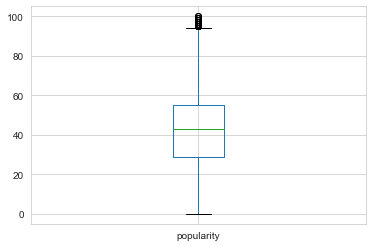

In [18]:
# Data Visulaization
dataframe.boxplot('popularity') #  Boxplot for numerical columns
plt.show()

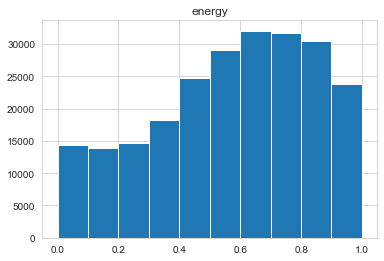

In [19]:
# Histogram for numerical columns
dataframe.hist('energy')
plt.show()

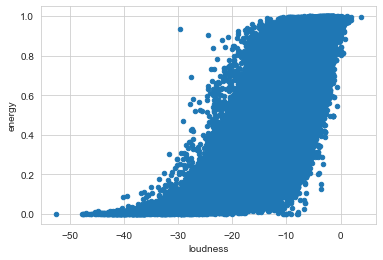

In [20]:
# Scatter plot for numerical columns
dataframe.plot(kind='scatter', x='loudness', y='energy')
plt.show()

Text(0.5, 1.0, 'Popularity Distribution')

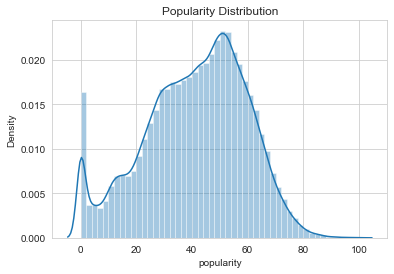

In [21]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [22]:
dataframe.corr()

popularity  acousticness  danceability  duration_sec  \
popularity          1.000000     -0.381295      0.256564      0.002348   
acousticness       -0.381295      1.000000     -0.364546      0.011203   
danceability        0.256564     -0.364546      1.000000     -0.125781   
duration_sec        0.002348      0.011203     -0.125781      1.000000   
energy              0.248922     -0.725576      0.325807     -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941      0.076021   
liveness           -0.167995      0.069004     -0.041684      0.023783   
loudness            0.363011     -0.690202      0.438668     -0.047618   
speechiness        -0.151076      0.150935      0.134560     -0.016171   
tempo               0.081039     -0.238247      0.021939     -0.028456   
valence             0.060076     -0.325798      0.547154     -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.210983 -0.167995  0.363011    -0.151076   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_sec     -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
popularity        0.081039  0.060076  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_sec     -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

Text(0.5, 1.0, 'Popularity Based on Time Signature')

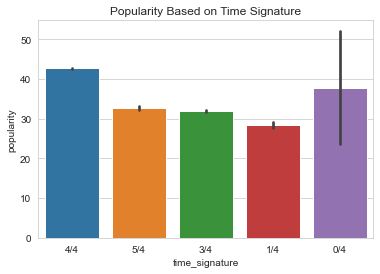

In [23]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

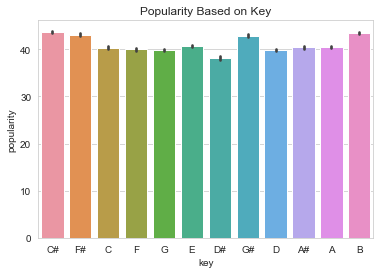

In [24]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

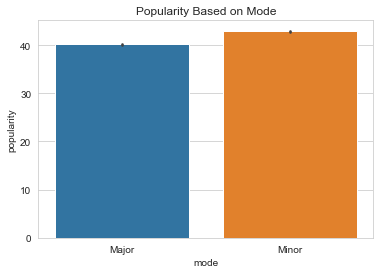

In [25]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

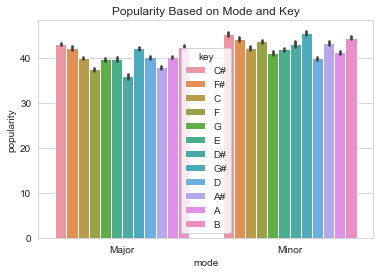

In [26]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

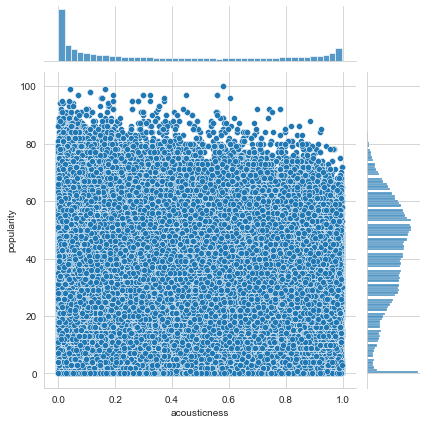

In [27]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

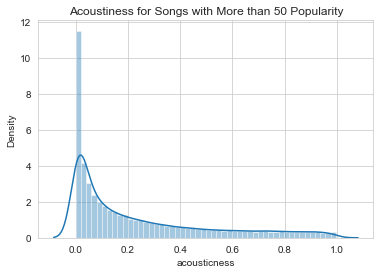

In [28]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

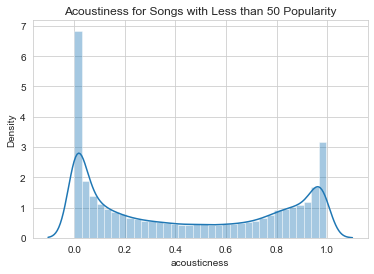

In [29]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

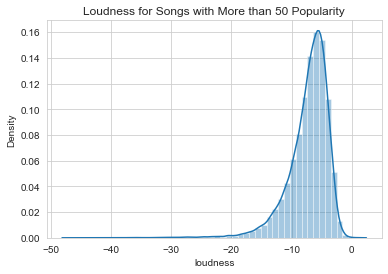

In [30]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

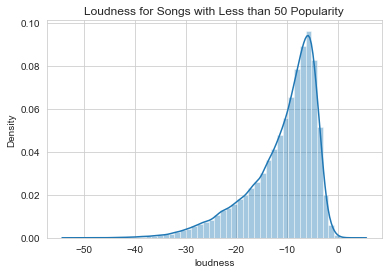

In [31]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

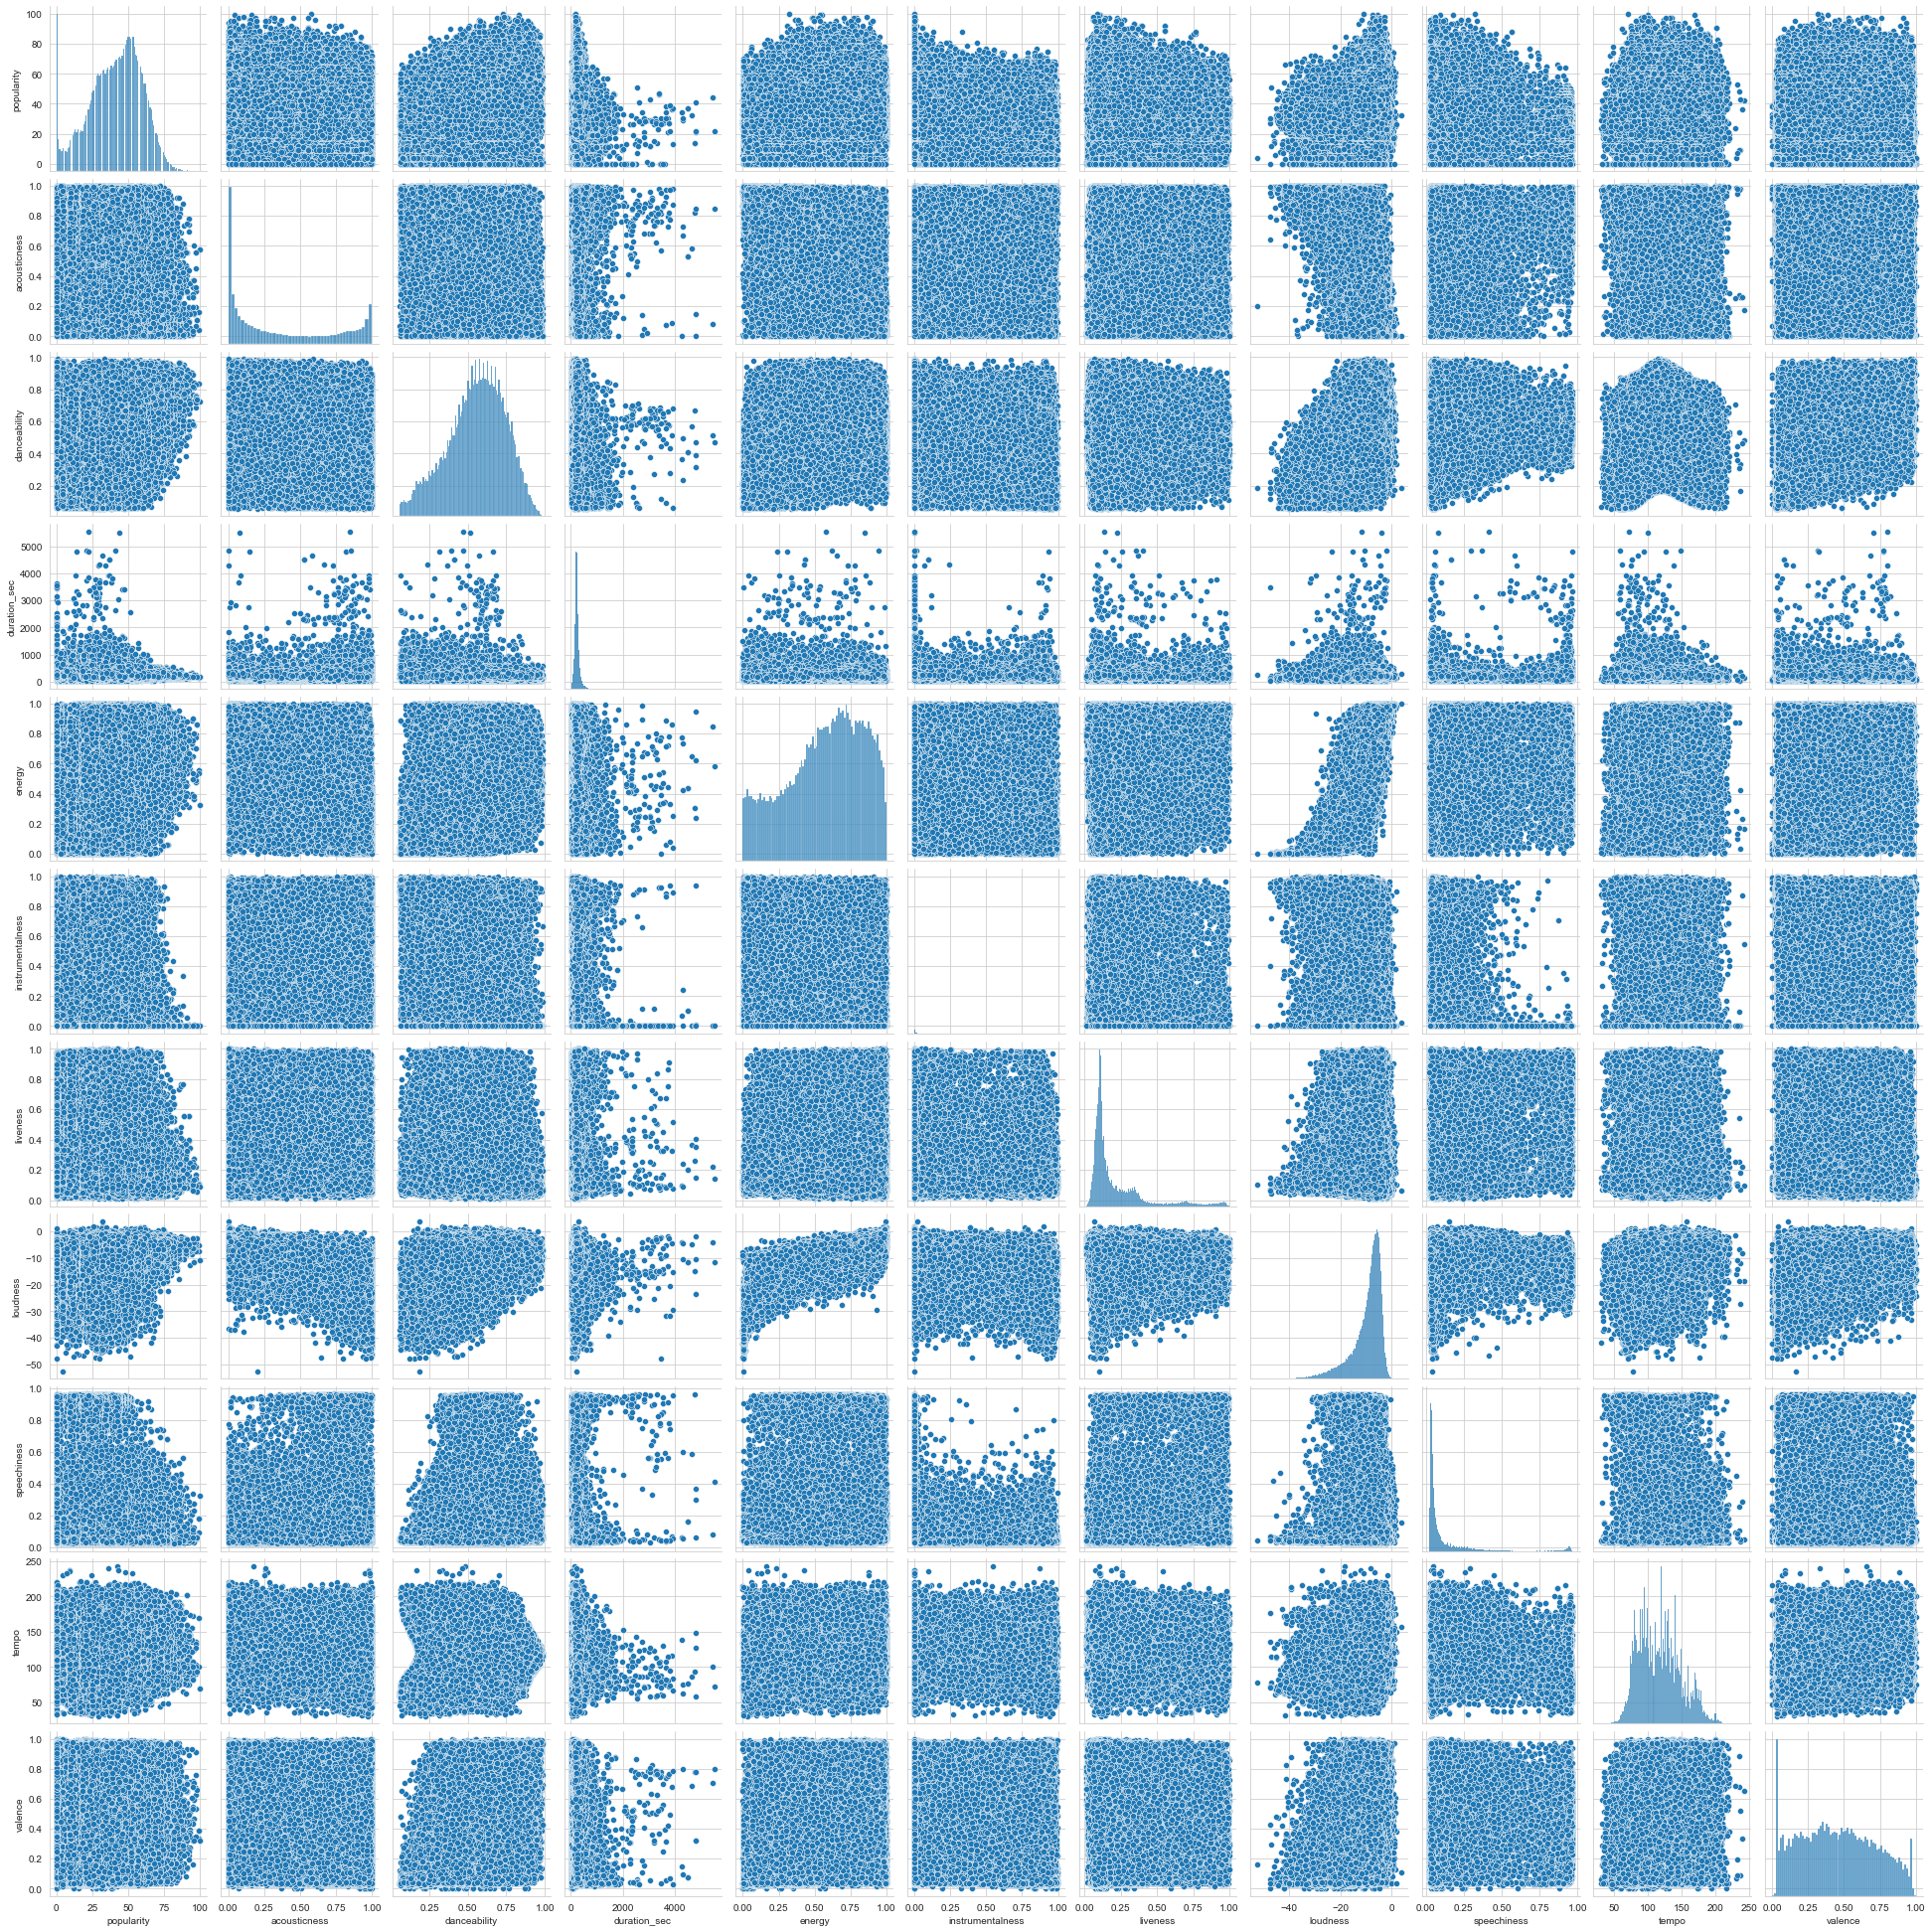

In [32]:
sns.pairplot(dataframe)

In [33]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

genre             artist_name                track_name  \
152289               R&B              The Weeknd                   Starboy   
204356        Soundtrack       Jóhann Jóhannsson               Fragment II   
110663               Pop       Rex Orange County    A Song About Being Sad   
11701        Alternative                Mastodon             Steambreather   
75260   Children's Music  Children Songs Company  Take This - Instrumental   

                      track_id  popularity  acousticness  danceability  \
152289  7MXVkk9YMctZqd1Srtv4MB          85      0.141000         0.678   
204356  4SP8QTXvCVNHjFTCEuuL1G          33      0.156000         0.167   
110663  6Jl3ZOX6MUOlyoUc721bsX          69      0.891000         0.568   
11701   4Ut80ggQbyiJN2pGCs7VfB          49      0.000041         0.358   
75260   6t44FUJonKndkVG2s0qj1E           0      0.006760         0.838   

        duration_sec  energy  instrumentalness key  liveness  loudness   mode  \
152289       230.453  0.5880          0.000006   4     0.137    -7.015  Major   
204356       132.187  0.0824          0.846000   7     0.179   -21.176  Major   
110663       136.000  0.2630          0.000000   3     0.183   -13.510  Major   
11701        303.107  0.9810          0.000674   8     0.184    -4.572  Major   
75260        321.080  0.7690          0.537000   4     0.642    -9.955  Major   

        speechiness    tempo time_signature  valence  
152289       0.2760  186.005            4/4   0.4860  
204356       0.0521  125.770            1/4   0.0394  
110663       0.1010  111.860            4/4   0.2440  
11701        0.1160  165.027            4/4   0.2620  
75260        0.0670  126.343            4/4   0.8310

In [34]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

genre                    artist_name  \
24265   Electronic              Nightmares On Wax   
30805        Anime            MAXIMUM THE HORMONE   
178238        Jazz  Christian Scott aTunde Adjuah   
134660      Reggae                        Sublime   
22260   Electronic                     Portishead   

                                    track_name                track_id  \
24265                                  Look Up  1tqU9QZxCG8DPfXPH1I25f   
30805      Usukimi Billy ~koigimi sairoku hen~  3I1wiaafi69Nekjwq6wmsD   
178238  Ancestral Recall (feat. Saul Williams)  1CZvusy1pGEyqKpCyDR6LU   
134660                           Garbage Grove  204Mp03UDldypQSOIUmRdQ   
22260                                Glory Box  3Ty7OTBNSigGEpeW2PqcsC   

        popularity  acousticness  danceability  duration_sec  energy  \
24265           49       0.02170         0.927       354.000   0.647   
30805           27       0.00043         0.338       200.653   0.982   
178238          38       0.00601         0.540       367.450   0.806   
134660          29       0.01000         0.793       132.373   0.542   
22260           67       0.22800         0.481       305.560   0.409   

        instrumentalness key  liveness  loudness mode  speechiness    tempo  \
24265           0.073200  11    0.0561    -9.006    0       0.1280  120.004   
30805           0.140000   7    0.3290    -2.075    1       0.2050  131.500   
178238          0.557000   2    0.0759    -6.446    0       0.0546  150.018   
134660          0.000002  11    0.0381   -10.720    1       0.1680   92.091   
22260           0.409000   0    0.0735    -9.919    1       0.0396  119.756   

       time_signature  valence  
24265             4/4    0.794  
30805             4/4    0.324  
178238            3/4    0.637  
134660            4/4    0.597  
22260             4/4    0.232

In [35]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre    artist_name                     track_name  \
21090  Dance    Niall Horan  Slow Hands - Basic Tape Remix   
57050    R&B  Sean Kingston                      Dumb Love   
61208    R&B      LL Cool J            Around The Way Girl   
44473   Folk          Raffi                        Mr. Sun   
29890  Anime        DECO*27                        EGOMAMA   

                     track_id  popularity  acousticness  danceability  \
21090  3XJhDig11wzszomesWNOnV          49       0.00806         0.723   
57050  10QJkBWQJXPr3TYaPuH6gR          55       0.35600         0.758   
61208  6jL1SnyXcXiKOmw4M2RnmT          52       0.00268         0.614   
44473  6n3qzK1msumNEERJI17dWi          47       0.39800         0.515   
29890  77lxrKgYoLuHorNeZqHQog          26       0.00244         0.528   

       duration_sec  energy  instrumentalness key  liveness  loudness mode  \
21090       182.608   0.720          0.000000   2    0.0885    -5.675    1   
57050       186.773   0.646          0.000000   2    0.4730    -3.662    1   
61208       248.493   0.445          0.019400   0    0.3350   -17.091    0   
44473        74.787   0.378          0.000389   8    0.3550    -8.750    1   
29890       267.173   0.901          0.000504  11    0.3190    -4.109    0   

       speechiness    tempo time_signature  valence  
21090       0.0325  113.994              0    0.902  
57050       0.0724  128.031              0    0.876  
61208       0.4240  202.191              0    0.626  
44473       0.0549  175.177              0    0.965  
29890       0.0887  155.078              0    0.577

In [36]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1] 

genre     artist_name  \
135      R&B   Mary J. Blige   
136      R&B         Rihanna   
137      R&B       Yung Bleu   
138      R&B        Surfaces   
139      R&B  Olivia O'Brien   
...      ...             ...   
230312  Soul     James Brown   
230782  Soul    Alex Hepburn   
230817  Soul    Paloma Faith   
230946  Soul     James Brown   
231493  Soul      Simply Red   

                                               track_name  \
135                            Be Without You - Kendu Mix   
136                                             Desperado   
137            Ice On My Baby (feat. Kevin Gates) - Remix   
138                             Heaven Falls / Fall on Me   
139                                           Love Myself   
...                                                   ...   
230312  Get Up (I Feel Like Being A) Sex Machine - Pts...   
230782                                        If You Stay   
230817                        Make Your Own Kind of Music   
230946                 Papa's Got A Brand New Bag - Pt. 1   
231493                             The Air That I Breathe   

                      track_id  popularity  acousticness  danceability  \
135     2YegxR5As7BeQuVp2U6pek           1       0.08300         0.724   
136     6KFaHC9G178beAp7P0Vi5S           1       0.32300         0.685   
137     6muW8cSjJ3rusKJ0vH5olw           1       0.06750         0.762   
138     7yHqOZfsXYlicyoMt62yC6           1       0.36000         0.563   
139     4XzgjxGKqULifVf7mnDIQK           1       0.59600         0.653   
...                        ...         ...           ...           ...   
230312  6hpmTwgNCz81H2bFEREx29           1       0.27300         0.833   
230782  4sJoIeb8zWYCLHSLM0az3b           1       0.04530         0.719   
230817  5jsFFhABp2FkasGr4QcQd6           1       0.00862         0.567   
230946  5aZzmPUv5a2nna9sxBrmpL           1       0.51900         0.775   
231493  4Sfq2ZuUK9tS66eXqCCKRF           1       0.21000         0.660   

        duration_sec  energy  instrumentalness key  liveness  loudness mode  \
135          246.333   0.689          0.000000   8    0.3040    -5.922    0   
136          186.467   0.610          0.000000   2    0.1020    -5.221    0   
137          199.520   0.520          0.000004   3    0.1140    -5.237    0   
138          240.597   0.366          0.002430  11    0.0955    -6.896    0   
139          213.947   0.621          0.000000  11    0.0811    -5.721    0   
...              ...     ...               ...  ..       ...       ...  ...   
230312       318.800   0.661          0.000149   9    0.2940    -7.595    0   
230782       194.554   0.702          0.000014  11    0.0662    -4.577    1   
230817       163.840   0.753          0.001830   5    0.1270    -4.823    1   
230946       128.973   0.725          0.054100   5    0.0944    -8.369    1   
231493       262.827   0.560          0.000040   2    0.0974    -8.894    1   

        speechiness    tempo time_signature  valence  
135          0.1350  146.496              0   0.6930  
136          0.0439   94.384              2   0.3230  
137          0.0959   75.047              0   0.0862  
138          0.1210   85.352              0   0.7680  
139          0.0409  100.006              0   0.4660  
...             ...      ...            ...      ...  
230312       0.1010  108.314              0   0.8580  
230782       0.0357  116.938              0   0.6130  
230817       0.0406  120.098              0   0.5660  
230946       0.0944  129.681              0   0.9140  
231493       0.0287   89.505              0   0.6410  

[49104 rows x 18 columns]

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [39]:
features = ["acousticness", "danceability", "duration_sec", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [40]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [42]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7900418949403802


In [43]:
data = dataframe.copy()
data.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           0         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           0         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           0         0.950         0.331   

   duration_sec  energy  instrumentalness key  liveness  loudness mode  \
0        99.373   0.910             0.000   0    0.3460    -1.828    1   
1       137.373   0.737             0.000   1    0.1510    -5.559    0   
2       170.267   0.131             0.000   2    0.1030   -13.879    0   
3       152.427   0.326             0.000   0    0.0985   -12.178    1   
4        82.625   0.225             0.123   3    0.2020   -21.150    1   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969              0    0.814  
1       0.0868  174.003              0    0.816  
2       0.0362   99.488              1    0.368  
3       0.0395  171.758              0    0.227  
4       0.0456  140.576              0    0.390

In [44]:
data = data.drop(labels=["track_id", "artist_name", "genre", "track_name"], axis=1)

In [45]:
data.head()

popularity  acousticness  danceability  duration_sec  energy  \
0           0         0.611         0.389        99.373   0.910   
1           0         0.246         0.590       137.373   0.737   
2           0         0.952         0.663       170.267   0.131   
3           0         0.703         0.240       152.427   0.326   
4           0         0.950         0.331        82.625   0.225   

   instrumentalness key  liveness  loudness mode  speechiness    tempo  \
0             0.000   0    0.3460    -1.828    1       0.0525  166.969   
1             0.000   1    0.1510    -5.559    0       0.0868  174.003   
2             0.000   2    0.1030   -13.879    0       0.0362   99.488   
3             0.000   0    0.0985   -12.178    1       0.0395  171.758   
4             0.123   3    0.2020   -21.150    1       0.0456  140.576   

  time_signature  valence  
0              0    0.814  
1              0    0.816  
2              1    0.368  
3              0    0.227  
4              0    0.390

In [46]:
#Test-Train Split
from sklearn.model_selection import train_test_split

X = data.drop("danceability", axis=1)
y = dataframe["danceability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (162907, 13)
Shape of X_test (69818, 13)
Shape of y_train (162907,)
Shape of y_test (69818,)


In [47]:
num_cols = data[data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')]]
num_cols.shape

(232725, 11)

In [48]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        232725 non-null  int64  
 1   acousticness      232725 non-null  float64
 2   danceability      232725 non-null  float64
 3   duration_sec      232725 non-null  float64
 4   energy            232725 non-null  float64
 5   instrumentalness  232725 non-null  float64
 6   liveness          232725 non-null  float64
 7   loudness          232725 non-null  float64
 8   speechiness       232725 non-null  float64
 9   tempo             232725 non-null  float64
 10  valence           232725 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 19.5 MB


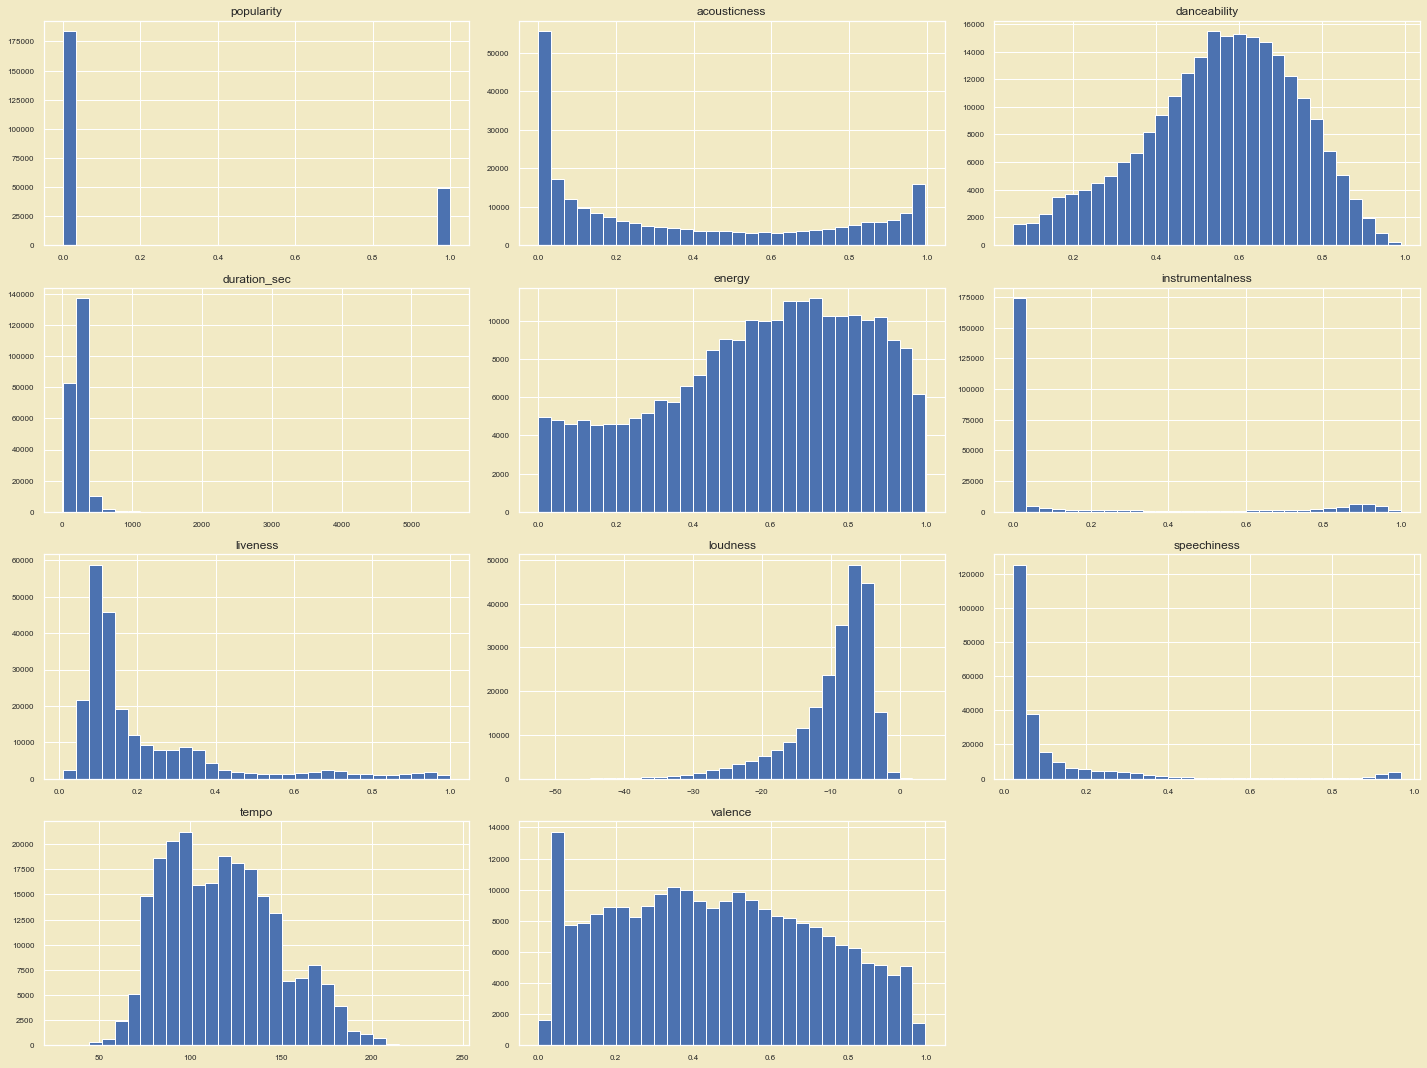

In [49]:
#Checking distribution of numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming that `data` is your original DataFrame
X = data.drop("danceability", axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, random_state=48)
data['cluster'] = kmeans.fit_predict(scaled_features)

In [51]:
kmeans = KMeans(n_clusters=7, random_state=48) 
data['cluster'] = kmeans.fit_predict(scaled_features)

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

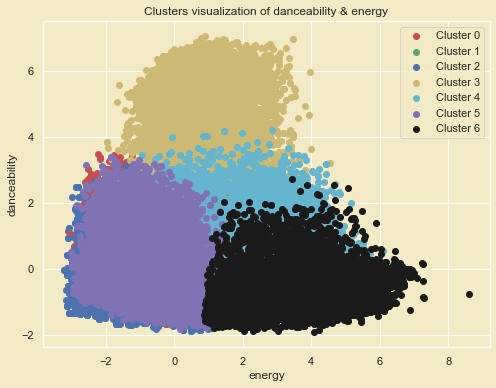

In [53]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']  # Colors for the clusters

# Plot each cluster
for i in range(7):
    
    idx = data['cluster'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

# Adjust visuals
plt.title('Clusters visualization of danceability & energy')
plt.xlabel('energy')
plt.ylabel('danceability')
plt.legend()
plt.grid(True)
plt.show()